In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown "1WuI9yiGKLpSJo5yQIfP5VGavbwAAELZT"

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
train_df = pd.read_csv('data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


In [5]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [6]:
train_df.isnull().sum()


Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
######
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [12]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

In [13]:
!pip install mlflow

import mlflow

mlflow.set_experiment("Loan Application")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


2025/11/07 15:56:50 INFO mlflow.tracking.fluent: Experiment with name 'Loan Application' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/LENOVO/Desktop/MLOps/OCT-Flask-Web-App/mlruns/308684307625679961', creation_time=1762511210801, experiment_id='308684307625679961', last_update_time=1762511210801, lifecycle_stage='active', name='Loan Application', tags={}>

In [14]:

with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc= accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc= accuracy_score(y_train, pred_train)

    mlflow.set_tag ('mlflow.runName', 'first_run')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric ('val_acc', val_acc)
    mlflow.log_metric ('train_acc', train_acc)

    mlflow.sklearn.log_model(model_rf,"rf model")







2025/11/07 15:56:51 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/11/07 15:56:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

In [15]:
# !mlflow ui

In [16]:
def ml_flow_runs (n_est, max_dep, i):
    with mlflow.start_run():
        model_rf = RandomForestClassifier(max_depth=max_dep,n_estimators=n_est, random_state=5)
        model_rf.fit(X_train, y_train)

        pred_val = model_rf.predict(X_val)
        val_acc= accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(X_train)
        train_acc= accuracy_score(y_train, pred_train)

        run ="Run: "+str(i)
        mlflow.set_tag ('mlflow.runName',run)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_param('estimators',n_est)
        mlflow.log_metric ('val_acc', val_acc)
        mlflow.log_metric ('train_acc', train_acc)

        mlflow.sklearn.log_model(model_rf,"rf model")


### **Automate-**

In [17]:
for i in range(1,11):
    ml_flow_runs(10+i,1+i,i)


2025/11/07 15:57:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:57:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/07 15:57:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:57:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/07 15:57:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:57:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/07 15:57:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

In [18]:
!mlflow ui

^C


In [ ]:
# !lsof -i :5000

In [ ]:
# !kill -9 583

In [ ]:
# !mlflow ui

### **KNN Model -**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

2025/11/07 16:23:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 16:23:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


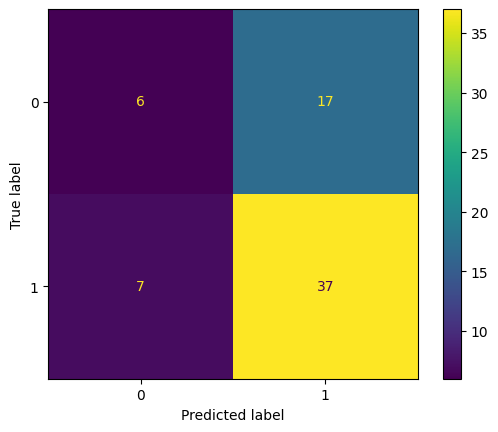

In [20]:
with mlflow.start_run():
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train, y_train)

    pred_val = model_knn.predict(X_val)
    val_acc= accuracy_score(y_val, pred_val)

    pred_train = model_knn.predict(X_train)
    train_acc= accuracy_score(y_train, pred_train)

    run ="KNN"
    mlflow.set_tag ('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric ('val_acc', val_acc)
    mlflow.log_metric ('train_acc', train_acc)

    cm= ConfusionMatrixDisplay.from_predictions(y_val,pred_val)
    cm.figure_.savefig('Confusion_mat.png')

    mlflow.log_artifact('Confusion_mat.png')


    mlflow.sklearn.log_model(model_knn,"KNN model")